# ANOVA
### Prof. Dr. Juanjo Manjarín
**Statistics & Data Analysis**

---

In this document we are going to develop and implement the basic ideas of the One-way ANOVA for the comparison of different population means. In this context we must say that ANOVA is just a hypothesis testing procedure that considers all the populations at once instead of go using all the possible two populations tests.

ANOVA is the usual name that a general class of linear models receive: those in which we only have **categorical explanatory variables**. Also, as a sort of field on its own, it has its own nomeclature:

 * We will denote as **Factors** to all the predictors (explanatory variables) of the model
 * We will denote as **Levels** to the observations of the factors, i.e. to all the possible categories
 * We will denote as **Effects** to the estimated parameters of the regression

With respect to this last idea, let's make another observation: with respect to the nature of these effects we may have three different types of models:

 * **Fixed Effects Models**: in this case the effects (estimated parameters) are constant in time, i.e. they are real numbers
 * **Random Effects Models**: in this case the estimated effects are random variables
 * **Mixed Effects Models**: in this case the estimated effects are both, constant and/or random variables

All the models we will consider in this document are Fixed Effects, i.e. all the estimated quantities will be constants.



## General Description

Suppose a model in which we want to study if the the belonging to a certain group may affect the value of a response variable. We consider these groups as the different levels of one single categorical variable (with any number of possible levels)

We, then, propose the following model

\begin{equation}
x_{ij} = m + \tau_i + e_{ij}
\end{equation}

where:

  * $x_{ij}$ is the *j*th observation of the *i*th population
  * $\tau_i$ is the effect of belonging to the *i*th population
  * $e_{ij}$ is the random error of each observation
  * $m$ is the overall mean of all the observations

Remember that in any linear regression model, the response is always the conditional expected value of the response given that the regressors can take a given value.

In this context, the main idea is that if there is no difference between the different populations, then the variable $\tau_i$ must be irrelevant and then the expected value of each observation is the overall mean, up to some random errors. 

Then, the decision scheme that we use is

\begin{equation}
H_0:\,\{\mu_1=\dots=\mu_n\},\quad H_1:\,\{\text{at least one mean is different}\}
\end{equation}

which is basically an **overall significance test** for the regressors.

A technical note is that usually this is a **not of full rank model**, which means that, in general, there is not a unique solution for the estimators. 


## Model Assumptions

Just like for any linear model we are going to impose the following conditions:

 * The residuals must be normally distributed with zero expected value and same variance: $N(0,\,\sigma^2)$ (**homoskedasticity** and **zero conditional mean**).
 * The observations must be **independent**, satisfied as usual if the sample size is at most the 10% of the population size (in any case there is a formal test)
 


## ANalysis Of VAriance

Using the first condition, we can take the expected value in the equation of the model and see that there are some valid estimators for the **overall mean**:

\begin{equation}
\hat m = {\bar{\bar x}}
\end{equation}

and for the **group effect**:

\begin{equation}
\hat\tau = \bar x_i -\bar{\bar x}
\end{equation}

if we plug this last equation in the model above we find an equation for the **residuals**

\begin{equation}
\hat e_{ij} = x_{ij} - \bar x_i
\end{equation}

from here we can find two different sum of squares for this model:

  * The **sum of squared residuals** (SSR or SSW)
  <br>
  \begin{equation}SSW = \sum_{ij} \hat e_{ij}^2 = \sum_{i,j} (x_{ij} - \bar x_i)^2
  \end{equation}
  
   which is known in this context as the Sum of Squares Within groups or **Unexplained Variability**. This last name implies that it is the part of variability that we will always have since it is due to the random nature of our variables, in the end it is nothing more than the variance. Now, what we usually want is this quantity divided by the number of degrees of freedom, a sort of average, in this case, since there are $N$ observations and $K$ populations, we have $N-K$ degrees of freedom, then we define
      
  \begin{equation}MSR = \frac{SSR}{n - K}\end{equation}

&nbsp;

  * The **sum of squares between groups** (SSG)
  
  \begin{equation}SSG = \sum_{i} \hat \tau_{i}^2 = \sum_{i} (\bar x_i -\bar{\bar x})^2\end{equation}
  
   which is known in this context as the **Explained Variability**, which implies that this is the variability of the response that we will be able to explain using our model. See that it is just the difference from each population mean to the overall mean, then if the model is relevant these differences will be significantly important. Just as before, we can find the degrees of freedom, which in this case it is simply $K-1$, then
      
    \begin{equation}MSG = \frac{SSG}{K-1}\end{equation}

Now we can define an F-ratio as

\begin{equation}F = \frac{MSG}{MSW}\end{equation}

We use this value as the test statistic, then:

  * If the model is useful, and let us explain the variability of the response in terms of the effect of the population, i.e. if there is a significant difference in the mean of the populations, then the $MSG$ will be significantly greater than $MSW$ and then the F-value will be large and its p-value small
  
  * If the model is not useful, then the $MSW$ will be greater than $MSG$, the F-value will be small and the p-value big. This implies that there is no significant difference bewteen the population means

## ANOVA in Python

Let's perform this analysis of variance in the same dataset we used for the linear models: `forestarea`. Then let's first load the packages we need

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.formula.api import ols
from scipy.stats import mstats
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


now we load the dataset

In [ ]:
from google.colab import drive
drive.mount('mydrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at mydrive


In [ ]:
mydata = pd.read_csv("/content/mydrive/My Drive/IE Bootcamp - Math & Stats /data/forestarea.csv")
mydata.head()

,country,continent,forar2013,forar2014,forar2015,avprec2014,anwwith2014
0,Afghanistan,3,2.0678,2.0678,2.0678,327.0,NaN
1,Albania,5,28.2270,28.1920,28.1569,1485.0,NaN
2,Andorra,5,34.0426,34.0426,34.0426,NaN,NaN
3,Argentina,2,10.1238,10.0153,9.9069,591.0,12.9075
4,Armenia,5,11.6473,11.6544,11.6614,562.0,42.8780


Since we saw that the best model we could obtain was with the log transformed response variable (taking `anwwith2014` as response) let's find that variable and add it to the dataset (as well as the other transformed variables)

In [ ]:
mydata['lforar2014'] = np.log(mydata.forar2014)
mydata['lanwwith2014'] = np.log(mydata.anwwith2014)
mydata['lavprec2014'] = np.log(mydata.avprec2014)
mydata.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,country,continent,forar2013,forar2014,forar2015,avprec2014,anwwith2014,lforar2014,lanwwith2014,lavprec2014
0,Afghanistan,3,2.0678,2.0678,2.0678,327.0,NaN,0.726485,NaN,5.789960
1,Albania,5,28.2270,28.1920,28.1569,1485.0,NaN,3.339038,NaN,7.303170
2,Andorra,5,34.0426,34.0426,34.0426,NaN,NaN,3.527613,NaN,NaN
3,Argentina,2,10.1238,10.0153,9.9069,591.0,12.9075,2.304114,2.557809,6.381816
4,Armenia,5,11.6473,11.6544,11.6614,562.0,42.8780,2.455684,3.758359,6.331502


### Replacing Codes

Let's replace the `continent` code by their names

In [ ]:
mydata['continent'].replace({1: 'Africa', 2: 'America', 3: 'Asia', 4:'Australia', 5:'Europe'}, inplace= True)
mydata.head()

,country,continent,forar2013,forar2014,forar2015,avprec2014,anwwith2014,lforar2014,lanwwith2014,lavprec2014
0,Afghanistan,Asia,2.0678,2.0678,2.0678,327.0,NaN,0.726485,NaN,5.789960
1,Albania,Europe,28.2270,28.1920,28.1569,1485.0,NaN,3.339038,NaN,7.303170
2,Andorra,Europe,34.0426,34.0426,34.0426,NaN,NaN,3.527613,NaN,NaN
3,Argentina,America,10.1238,10.0153,9.9069,591.0,12.9075,2.304114,2.557809,6.381816
4,Armenia,Europe,11.6473,11.6544,11.6614,562.0,42.8780,2.455684,3.758359,6.331502


### Train/Test splitting

Now let's preform the usual 80/20 splitting for the train and test sets

In [ ]:
rand_state = np.random.RandomState(1)
df_train, df_test = train_test_split(mydata, 
                                   test_size = 0.20,
                                   random_state = rand_state)

### Descriptive

Let's use the `describe` function to have a first look at the distributions

In [ ]:
df_train.groupby('continent')['lanwwith2014'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,5.0,4.301492,2.441963,1.730327,3.543802,3.574862,4.339726,8.318742
America,9.0,1.699358,1.482905,-0.275490,0.278389,2.557809,2.904466,3.413462
Asia,1.0,3.801733,NaN,3.801733,3.801733,3.801733,3.801733,3.801733
Australia,2.0,0.804167,0.481001,0.464048,0.634108,0.804167,0.974227,1.144286
Europe,17.0,2.520752,1.130384,0.519508,1.710007,2.605109,3.428547,4.579386


Taking a look at the standard deviations, it seems that there are two continents that may be significantly different with respect to the mean and that may also give problems with the equality of variances: Africa and Australia.

Note also that from this table:

  * the data is unbalanced, i.e. the number of observations is different in each group
  * We do not have enough observations in Asia nor in Australia to proceed with them (we should drop them in the analysis)

In [ ]:
dataset = df_train[(df_train['continent'] != 'Asia') & (df_train['continent'] != 'Australia')]
dataset.head()

,country,continent,forar2013,forar2014,forar2015,avprec2014,anwwith2014,lforar2014,lanwwith2014,lavprec2014
66,Namibia,Africa,8.5843,8.4942,8.4041,285.0,NaN,2.139384,NaN,5.652489
42,Iceland,Europe,0.4648,0.4778,0.4908,1940.0,2.1006,-0.738563,0.742223,7.570443
40,Haiti,America,3.5776,3.5486,3.5196,1440.0,NaN,1.266553,NaN,7.272398
83,Senegal,Africa,43.3854,43.1777,42.9699,686.0,NaN,3.765324,NaN,6.530878
86,Slovak Republic,Europe,40.3344,40.3402,40.3477,824.0,4.4389,3.697348,1.490407,6.714171


From now we will work with these three continents only: Europe, Africa and America

\begin{equation}
E[\text{response}|\text{categorical}] = \beta_0 + \beta_1\,\text{categorical} + \text{error}
\end{equation}

### Checking the Assumptions

Since this ANOVA test is made on top of a linear model, we must check the assumptions of these type of models. In this case we will only consider:

  * Independency of the observations
  * Homoskedasticity of the residuals
  * Normality of the residuals

All these require that we have a model fitted and then from its residuals check the assumptions. However sometimes it is assumed (although formally wrong) that they may be directly checked with the data. In this case we can use the common rules:

 * Independency can be assumed if we have a sample with a size less than the 10% of the population size.
 * Homoskedasticity can be seen graphically with a comparison of boxplots and analytically with a Levene or Bartlett test (comparisons of multiple variances)
 * Normality can be checked with the normality of the sample (see in section **Failure of Normality** below)

Let's see how this may work

 * The sample is of size 34 (in the `df_train` once the NaN have been dropped) while the total number of countries is 195. This is the 17% so in this case we may have problems with correlations between different data
 * For the homoskedasticity we use

In [ ]:
ss.levene(dataset['lanwwith2014'][dataset['continent'] == 'Africa'].dropna(),
          dataset['lanwwith2014'][dataset['continent'] == 'America'].dropna(),
          dataset['lanwwith2014'][dataset['continent'] == 'Europe'].dropna())

LeveneResult(statistic=0.7261533147327975, pvalue=0.49265404472412444)

To use Bartlett test we should use

```python
ss.bartlett(dataset['lanwwith2014'], dataset['continent'])
```

but with the continent encoded as a numerical variable, i.e. the original encoding of the dataset. We leave that for you.

In any case, we can see that both tests return a p-value higher the the common significance levels, then we fail to reject the Null hypothesis and must conclude that we do not find evidence against the equality of variances. See that the boxplots may have led us to a different conclusion

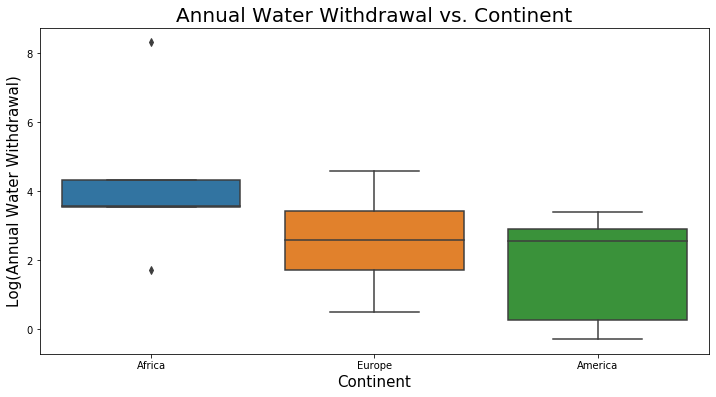

In [ ]:
plt.figure(figsize = (12,6))
g = sns.boxplot(data = dataset, x = 'continent', y = 'lanwwith2014')
g.axes.set_title('Annual Water Withdrawal vs. Continent', fontsize = 20)
g.axes.set_xlabel('Continent', fontsize = 15)
g.axes.set_ylabel('Log(Annual Water Withdrawal)', fontsize = 15)
plt.show()

## ANOVA - statsmodels

Now we define the ols model for the ANOVA test

In [ ]:
model = ols('lanwwith2014 ~ C(continent)', data = dataset).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lanwwith2014   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     4.944
Date:                Tue, 05 Nov 2019   Prob (F-statistic):             0.0145
Time:                        08:18:10   Log-Likelihood:                -54.703
No. Observations:                  31   AIC:                             115.4
Df Residuals:                      28   BIC:                             119.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.3015      0.665      6.470      0.000       2.940       5.663
C(continent)[T.America]    -2.6021      0.829     -3.138      0.004      -4.301      -0.903
C(continent)[T.Europe]     -1.7807      0.756     -2.354      0.026      -3.330      -0.231
==============================================================================
Omnibus:                        2.061   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                1.132
Skew:                           0.449   Prob(JB):                        0.568
Kurtosis:                       3.266   Cond. No.                         5.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the summary table we see that the base group is **Africa** and all the other continents are significant and relevant to explain the variability of the response. Now the ANOVA table can be found as

In [ ]:
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(continent),21.853699,2.0,4.943551,0.014499
Residual,61.889078,28.0,NaN,NaN


from where we see that the p-value is $0.0145$. So if our test were for a 5%, we Reject the Null hypothesis and conclude that we find evidence against the equality of means from our sample.



## ANOVA - scipy

We can also use the `scipy.stats` package where its `f_oneway` function gives the same answer, then

In [ ]:
ss.f_oneway(dataset['lanwwith2014'][dataset['continent'] == 'Africa'].dropna(),
            dataset['lanwwith2014'][dataset['continent'] == 'America'].dropna(),
            dataset['lanwwith2014'][dataset['continent'] == 'Europe'].dropna())

F_onewayResult(statistic=4.943550645723766, pvalue=0.014498835815697905)

So the p-value is the same as before and, therefore, the conclusion too.

## Post-hoc Analysis

If we Reject the NULL hypothesis there are two different approaches (there are more) we can take in order to find out which group is actually significantly different:

  * Bonferroni: we set a penalty in the significance level and then compute all the two population differences for this new significance level
  * Tukey: looks for a **minimum significant difference** (HSD or MSD) that may let us declare two populations as different. To do it we introduce the **Studentised Interquartile Range** distribution or Tukey's-q


In [ ]:
dataset_nona = dataset.dropna()
mc = MultiComparison(dataset_nona['lanwwith2014'], dataset_nona['continent'])
print(mc.tukeyhsd())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
 Africa America  -2.6021 0.0112 -4.6611 -0.5432   True
 Africa  Europe  -1.8669 0.0536 -3.7582  0.0244  False
America  Europe   0.7352 0.4736 -0.8028  2.2733  False
------------------------------------------------------


Since the null hypothesis is the equality of means, from the output we see that **Africa** is significantly different to **America** but not to **Europe** and that **America** and **Europe** are not significantly different (all for a 5%)

## Failure of Normality

To test for normality we can look at the table p-values for JB and Omnibus (0.568 and 0.357) respectively and use the functions we used in linear models to find the p-values for Shapiro-Wilk and D'Agostino tests


In [ ]:
def NormalityTests(x, sig_level):
    '''
    This function computes the p-value and statistics of the Shapiro-Wilk and D'Agostino tests for normality
    It also includes the set of libraries to be loaded in the test (no cheks done)
    
    Inputs:
    
     - x: array of values of the variable to be tested
     - sig_level: significance level to be used in the decision of the test
    
    Output
    
     - p-value, statistic and decision for both tests    
    '''
    from scipy.stats import shapiro
    from scipy.stats import normaltest
    
    shap_stat, shap_p = shapiro(x)
    k2_stat, k2_p = normaltest(x)
    
    print("From the Shapiro Wilk test:\n\nStatistic: ", shap_stat, "\np-value: ", shap_p)
    if shap_p > sig_level:
        print("Fail to reject Normality: No evidence found against normality\n\n")
    else:
        print("Reject Normality: Evidence found against normality\n\n")
    
    print("From the D'Agostino test:\n\nStatistic: ", k2_stat, "\np-value: ", k2_p)
    if k2_p > sig_level:
        print("Fail to reject Normality: No evidence found against normality\n\n")
    else:
        print("Reject Normality: Evidence found against normality\n\n")
             

def HisQQplots(x):
    '''
    This function plots the histogram and qq-plot of an array in order to perform a visual analysis of normality
    
    Inputs:
    
     - x: array to plot
    
    Output:
    
     A plot consisting in two subplots (one for each of the previous ones)
    '''
    # define the different regions
    f, (ax_box, ax_hist) = plt.subplots(2, 
                                        sharex = False, 
                                        gridspec_kw={"height_ratios": (.25, .75)})
    f.set_figheight(8)
    f.set_figwidth(8)
    plt.suptitle('Normality Plots', fontsize = 20)
    # Add a graph in each part
    sns.distplot(x, hist = True, 
                 kde = False, 
                 bins = 10, 
                 hist_kws={'edgecolor':'black'},
                 ax=ax_box)
    ss.probplot(x, plot=sns.mpl.pyplot)
    plt.tight_layout(rect=(0,0,1,0.94))

Then

In [ ]:
NormalityTests(model.resid, 0.01)

From the Shapiro Wilk test:

Statistic:  0.9688201546669006 
p-value:  0.4871917963027954
Fail to reject Normality: No evidence found against normality


From the D'Agostino test:

Statistic:  2.0607146476670692 
p-value:  0.3568794162620657
Fail to reject Normality: No evidence found against normality




And Graphically we can do

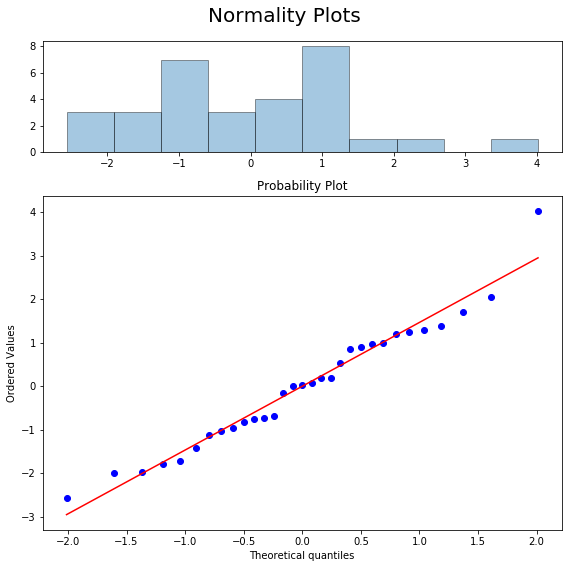

In [ ]:
HisQQplots(model.resid)

So in our case we do not find any problems with normality of our residuals but sometimes we will. In these cases, we may still perform a test for both:

 * Equatility of variances: Since Levene test is robust against outliers, can still be used when normality fails
 * Comparison of population: We use the **Kruskal-Wallis procedure**, a non-parametric test that does not require any normality in the variables



### Kruskal-Wallis

This procedure tests if the **median** of all the populations are equal and the only requirement is that the distributions of the populations are of the same *type*, i.e. all rigth-skewed, all leptokurtic,... In Python there are different implementations of it, we will use the one in **scipy.stats**

In [ ]:
print("Kruskal Wallis H-test test:\n")

H, pval = mstats.kruskalwallis(dataset['lanwwith2014'][dataset['continent'] == 'Africa'].dropna().values,
                               dataset['lanwwith2014'][dataset['continent'] == 'America'].dropna().values,
                               dataset['lanwwith2014'][dataset['continent'] == 'Europe'].dropna().values)

print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.05:
    print("\nReject the NULL hypothesis for a 5%: There is evidence in favor of significant differences between the populations.")
if pval > 0.05:
    print("\nFail to Reject the NULL hypothesis for a 5%: There is no evidence in favor of significant differences between the populations")

Kruskal Wallis H-test test:

H-statistic: 6.438614800759012
P-Value: 0.03998274070416039

Reject the NULL hypothesis for a 5%: There is evidence in favor of significant differences between the populations.


The only point we should be careful with when we run this function is that it only accepts arrays as inputs, that's why we have added the **.values** at the end.

The p-value is in no contradiction with the previous ANOVA result then we could perform a Post-hoc analysis. In this case we should use any of the following

 * Conover test.
 * Dunn test.
 * Dwass, Steel, Critchlow, and Fligner test.
 * Mann-Whitney test.
 * Nashimoto and Wright (NPM) test.
 * Nemenyi test.
 * van Waerden test.
 * Wilcoxon test.

which are for non-parametric designs. In Python we have all these functions in the `scipy.stats` package or from the `scipy.stats.mstats`. Mann-Whitney test, for example, require that the categories are also numerical variables.

In [ ]:
!pip install scikit_posthocs

In [ ]:
import scikit_posthocs as sp

In [ ]:
sp.posthoc_conover(dataset_nona, val_col='lanwwith2014', group_col='continent', p_adjust = 'holm')

,Africa,America,Europe
Africa,-1.000000,0.029372,0.095219
America,0.029372,-1.000000,0.252623
Europe,0.095219,0.252623,-1.000000


In the table we see the p-values of the comparisons of the continents in groups of 2. If we were using a 1%, none of the differences would be significant. However, for a 10%, only the difference bewteen Europe and America would not be significant. In fact these results coincide with those of Tukey's post-hoc.
